## 1. Data

The CSV contains <a href= 'https://www.kaggle.com/datasets/nphantawee/pump-sensor-data/data'>sensor data</a> recorded from an industrial machine.

**Goal**:  build a model that predicts the breakdown of a machine before it breaks down. 

In this section I will load the data and I will examine the structure of the dataframe.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import datetime

In [2]:
# Import the machine data and save them to a dataframe called df

df = pd.read_csv("sensor.csv").drop('Unnamed: 0', axis = 1)

In [3]:
# Check the first three rows of df

df.head(3)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.39757,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL


In [4]:
# Explore the last three columns of df

df.tail(3)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [5]:
# Check the infos of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [6]:
# Shape of df

df.shape

(220320, 54)

The dataframe df contains **220320 elements** and **54 columns**.

df is composed by: 

- 1 timestamp column, 
- 52 sensor's columns, 
- 1 machine status column.

Notice that column 16 (sensor_15) is empty.

Machine data cover the period from **01.04.2018** to **31.08.2018**.

## 2. Missing values

In this section I will handle the problem of missing values. Incomplete data can bias the results of the machine learning model and/or reduce the accuracy of the model. 
I will proceed by following this steps:

1. Check if our dataframe contains missing values and count them.
2. Drop or replace missing data properly.

In [7]:
# Check for each column the total number of its missing values

df.isnull().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


Let us drop the sensor_15 column since it has no values:

In [8]:
# Drop out sensor_15 column

df = df.drop('sensor_15', axis = 1 )

In this time-series analysis I think that the best method to handle with missing values is to fill them by propagating last valid observation forward. To do that, Pandas library has a forward fill method.

In [9]:
# Fill the remaining missing values

df = df.fillna(method='ffill')

## 3. Exploratory Data Analysis and Feature Engineering

Let us now explore our machine data and perform a preliminar feature engineering.

In [10]:
# Import data visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
# Set the background style of plots

sns.set_style('darkgrid')

Text(0.5, 1.0, 'Total observations by status')

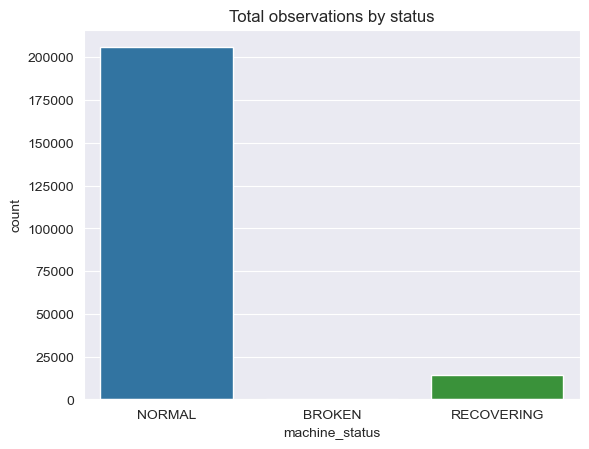

In [12]:
f = sns.countplot(x = 'machine_status', data = df)

f.set_title('Total observations by status')

**Class labels** we want to predict: NORMAL, BROKEN, and RECOVERING.

Since the NORMAL class label has a very high number of observations compared to others, we deduce that df is an **imbalanced** dataset.


In [13]:
# Count the total number of observations grouped by our machine_status column

df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

Machine breakdowns seven times during the period from 1 April to 31 August 2018.

In [14]:
# When the machine fails

print('List of the seven breakdown moments:\n')

for time in df[df['machine_status']== 'BROKEN']['timestamp']:
    print(time)

List of the seven breakdown moments:

2018-04-12 21:55:00
2018-04-18 00:30:00
2018-05-19 03:18:00
2018-05-25 00:30:00
2018-06-28 22:00:00
2018-07-08 00:11:00
2018-07-25 14:00:00


To see (then) if there is some correlation between breakdowns and the times of machine fails, I extract now new time features from the timestamp column. 

In [15]:
# Define the time function: it converts timestamp column to datetime data and then it extrapolates new time's features from timestamp column

def time(data):
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    data['hour']=data['timestamp'].dt.hour
    data['minute']=data['timestamp'].dt.minute
    
    
    
    return data

In [16]:
# Apply time function to df

time(df)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,month,day,hour,minute
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,4,1,0,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,4,1,0,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,4,1,0,2
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,4,1,0,3
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,41.087960,212.3843,153.64580,1000.0000,231.1921,NORMAL,8,31,23,55
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,40.798610,213.8310,156.25000,1000.0000,231.1921,NORMAL,8,31,23,56
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,40.798610,217.3032,155.38190,1000.0000,232.0602,NORMAL,8,31,23,57
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.509258,222.5116,153.93520,1000.0000,234.0856,NORMAL,8,31,23,58


Observe that our dataframe contains now **57 columns** : month, day, hour, and minute have been added.

Thanks to data visulisation I want to check if there is a recurrent pattern between different sensors evolving in our time period.

In [17]:
# For the next plot define sensors_df

df_sensors = df.set_index('timestamp')
print(df_sensors.columns)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status', 'month', 'day', 'hour', 'minute'],
      dtype='object')


In [18]:
# Extract the rows corrisponding to the BROKEN machine status
broken = df_sensors[df_sensors['machine_status']=='BROKEN']

# Extract the name of each sensor
sensors = df_sensors.columns[:51]

In [19]:
sensors

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51'],
      dtype='object')

C:\Users\giuli\AppData\Local\Temp\ipykernel_26208\1696748005.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _=plt.figure(figsize=(18,3))


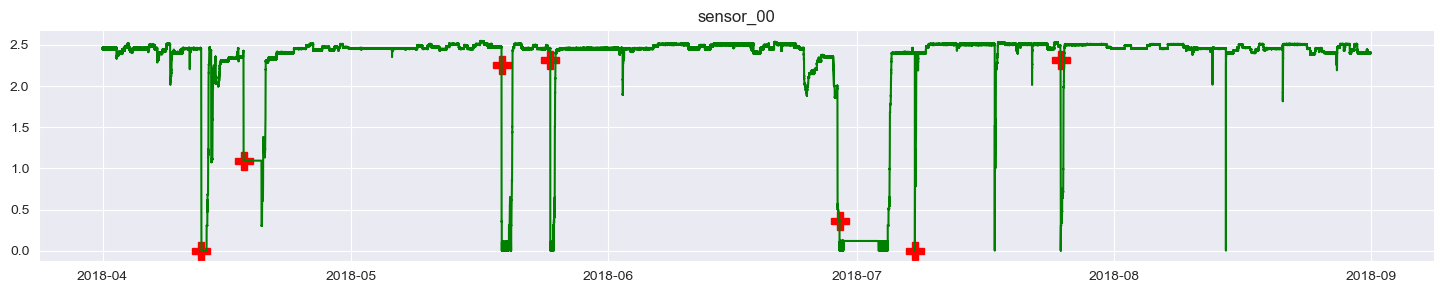

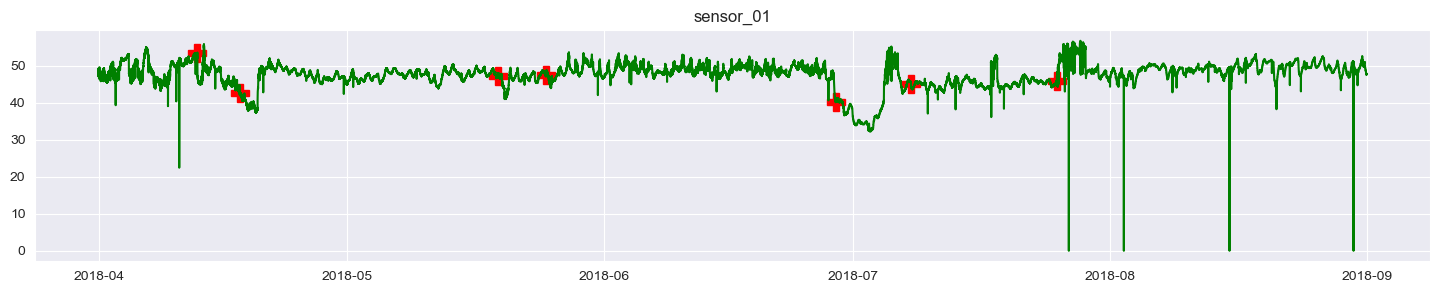

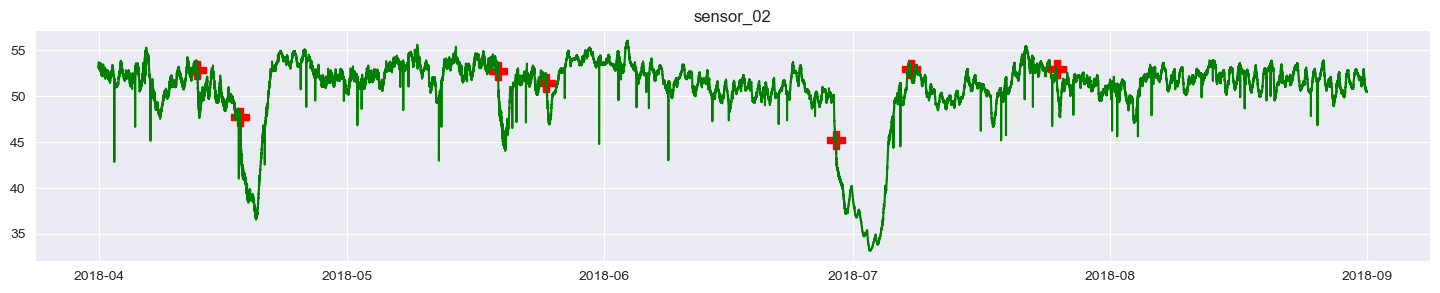

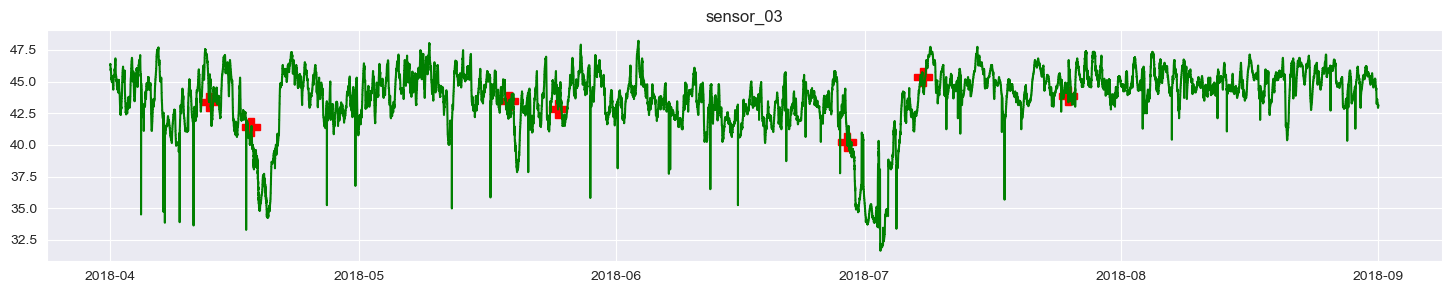

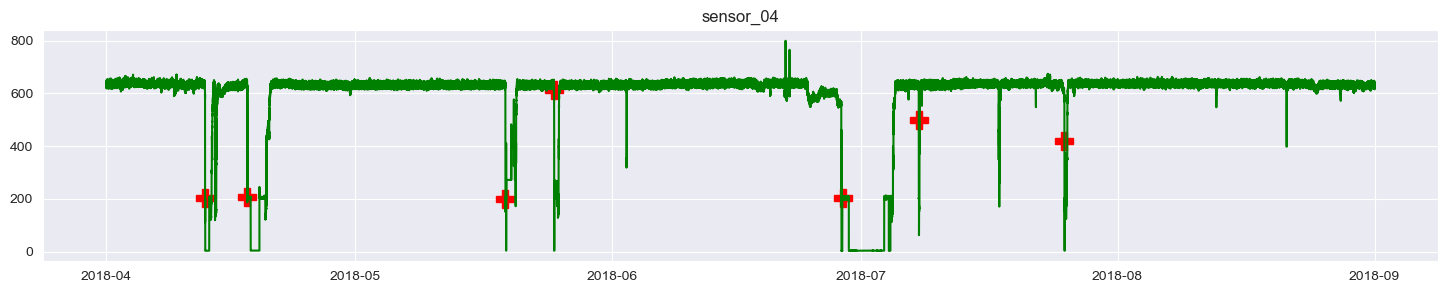

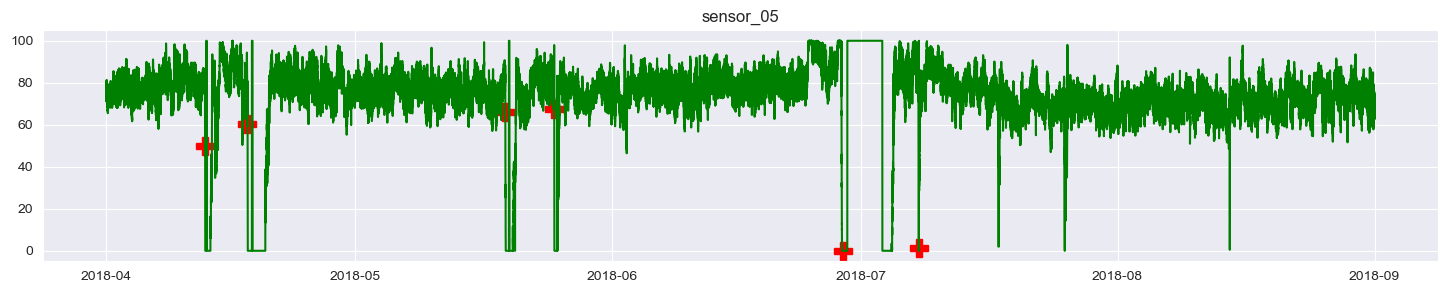

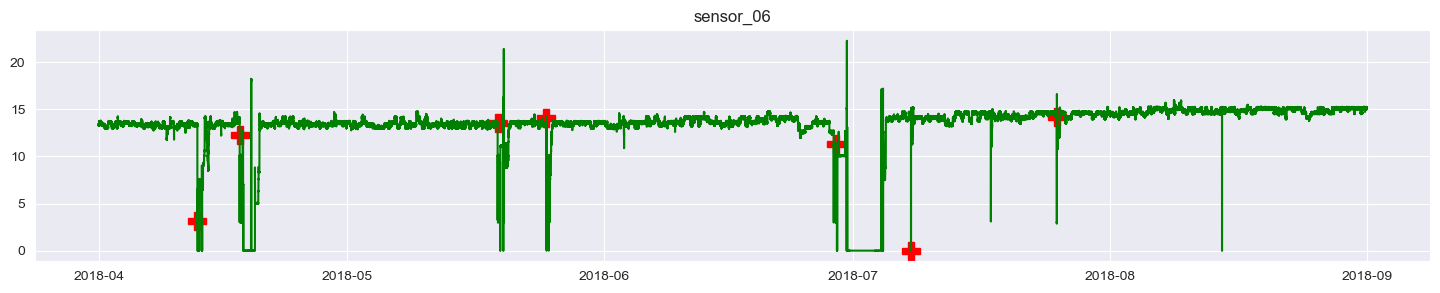

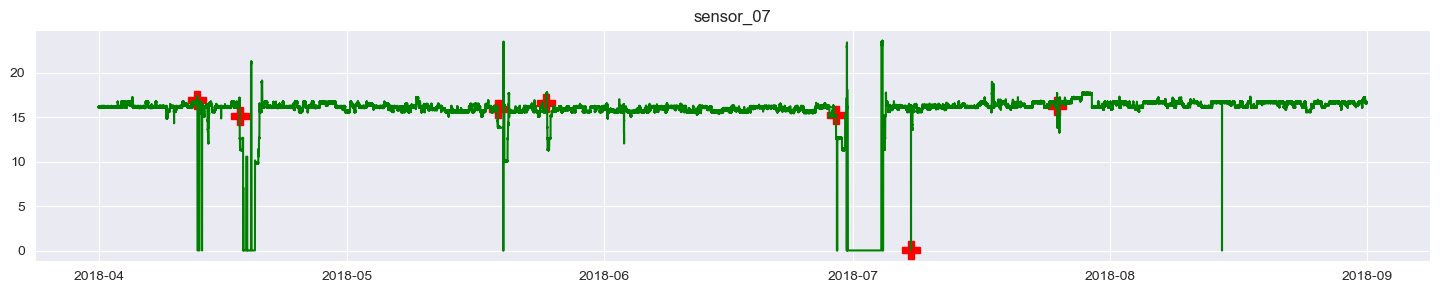

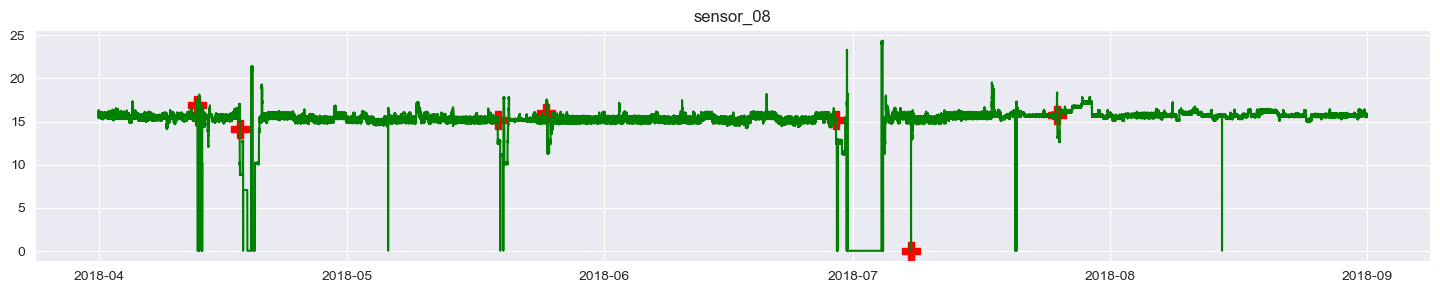

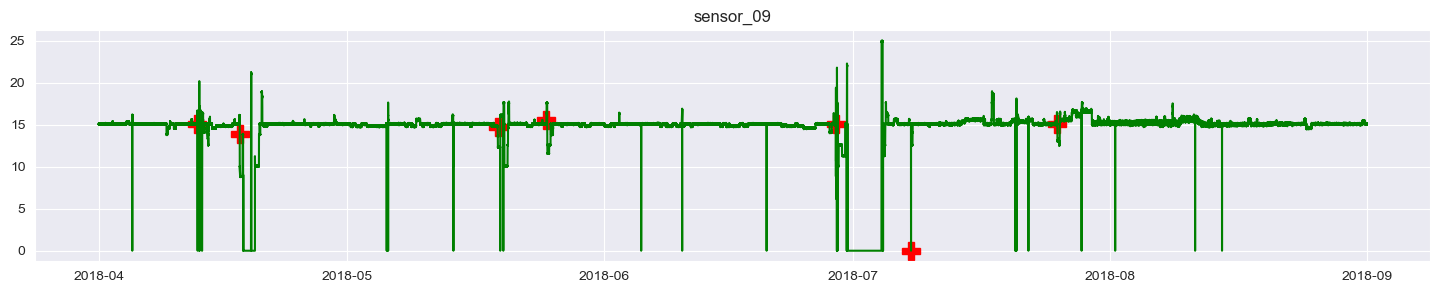

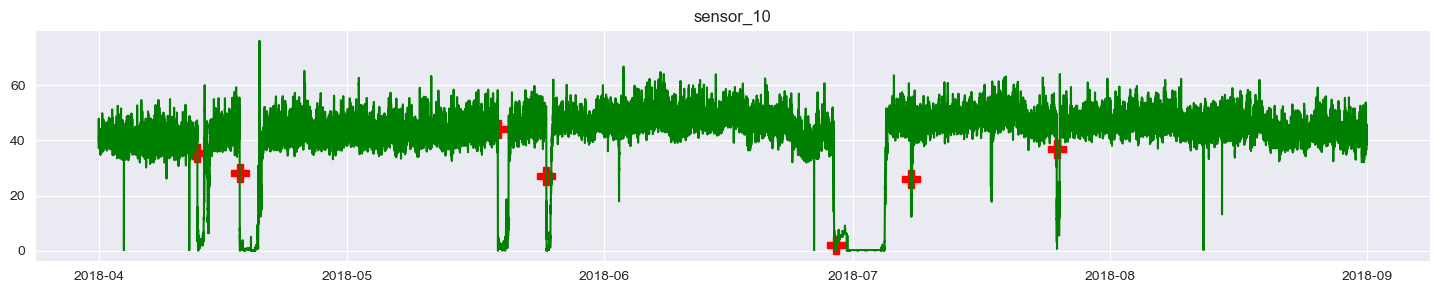

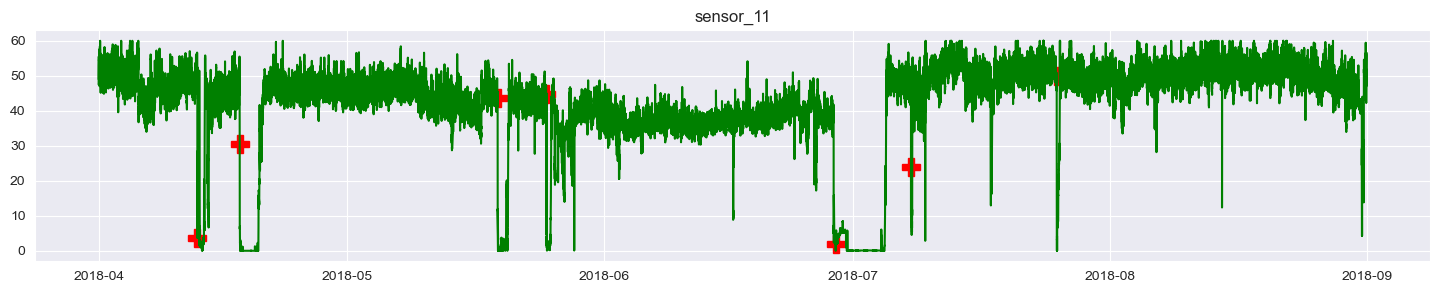

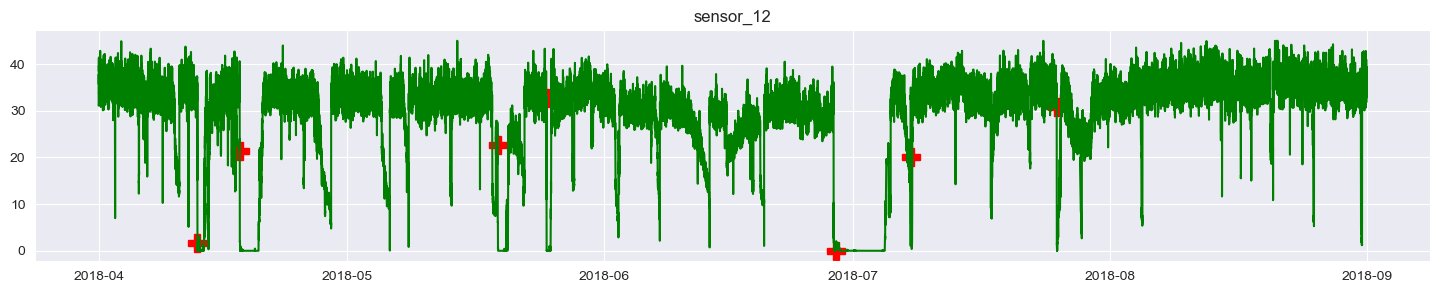

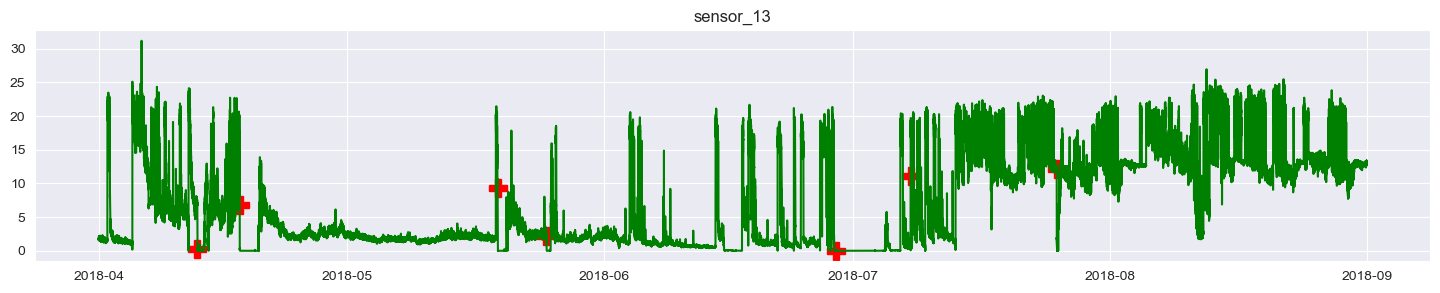

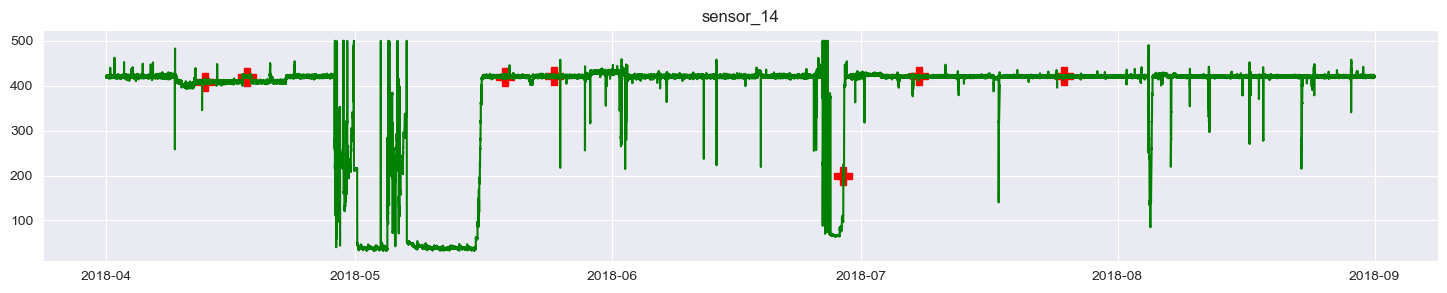

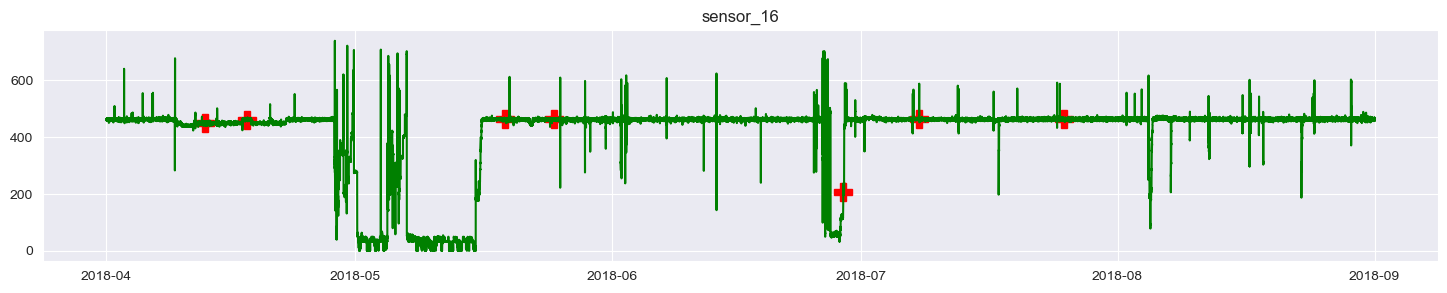

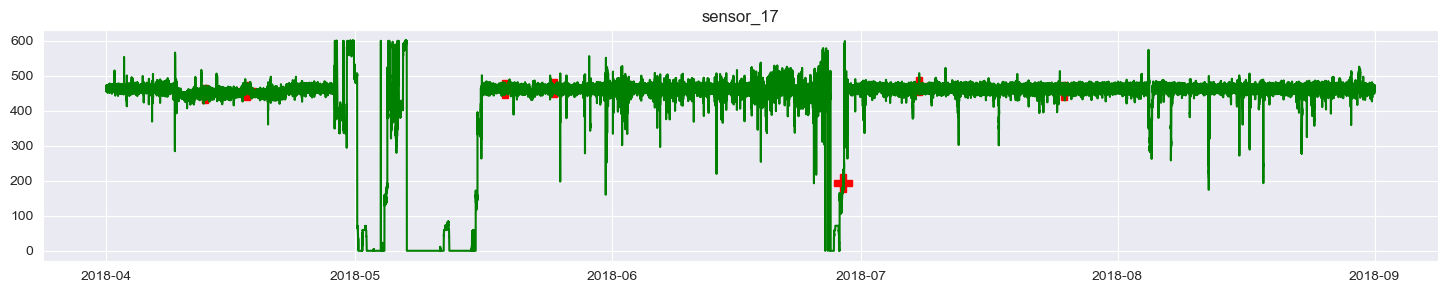

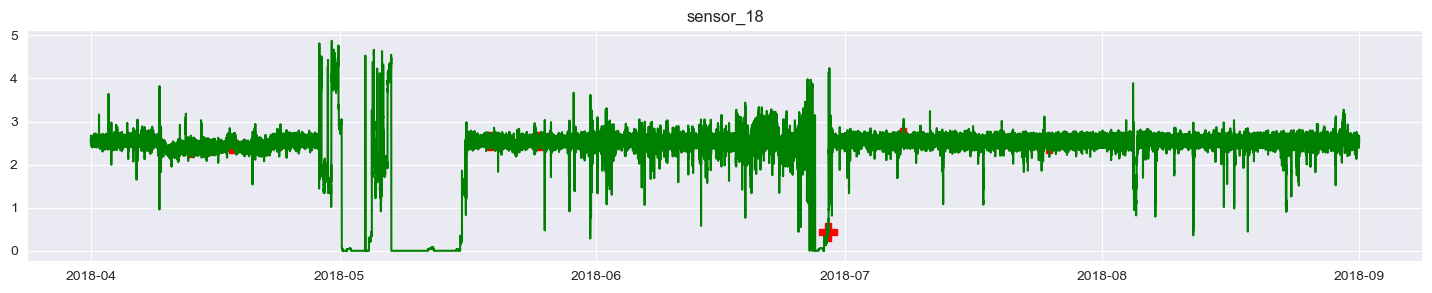

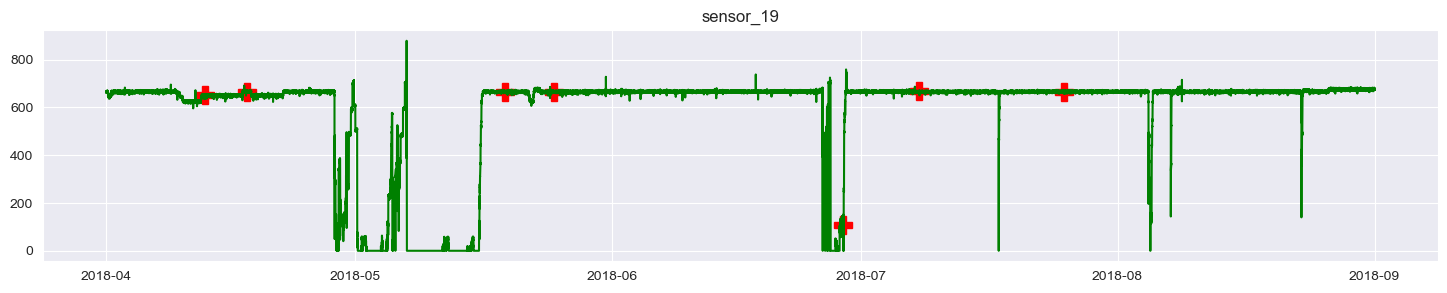

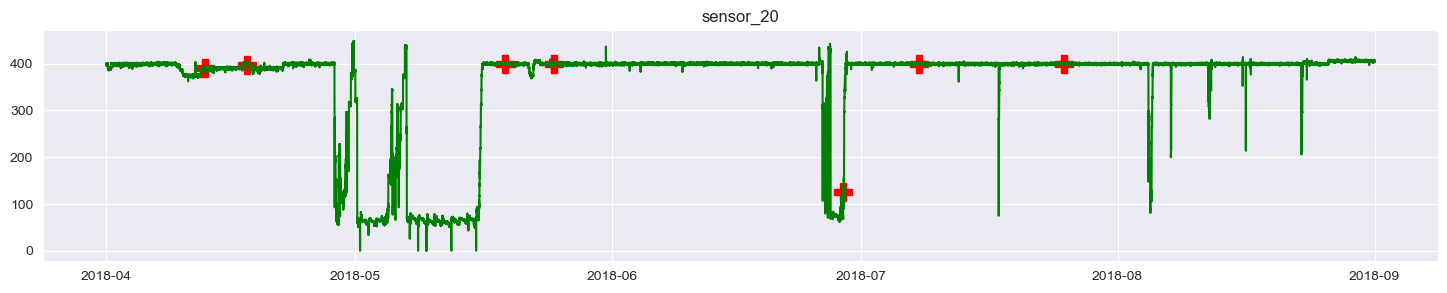

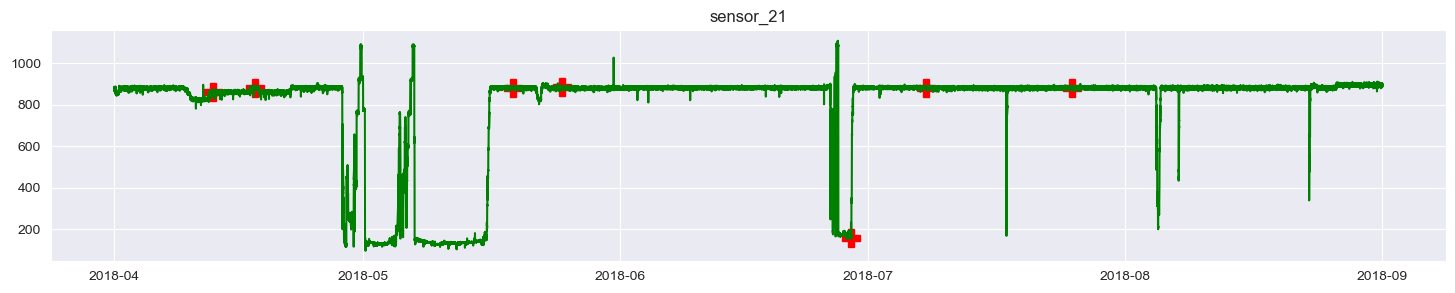

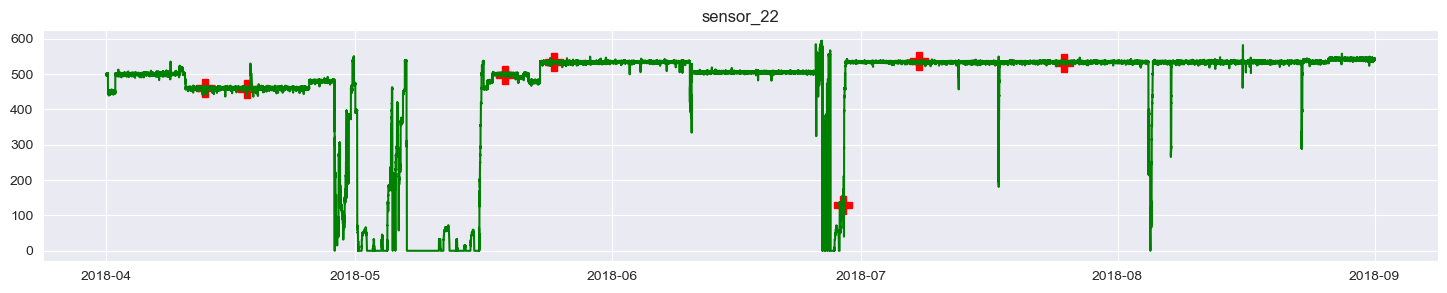

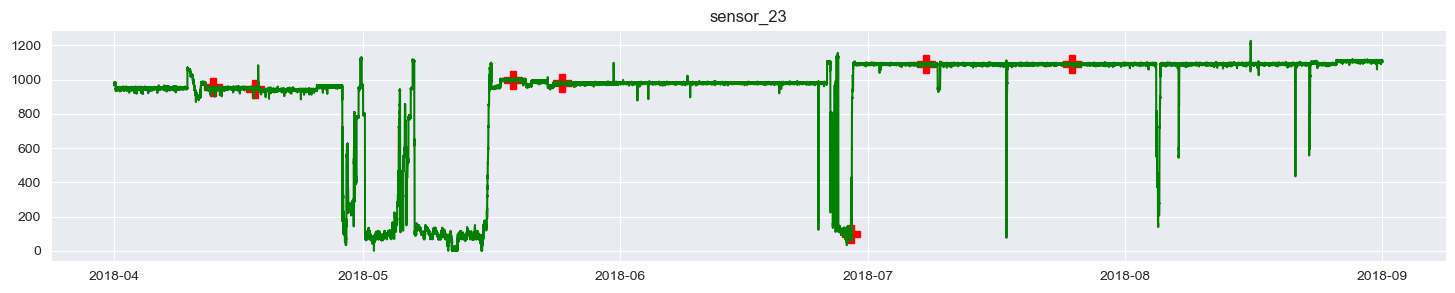

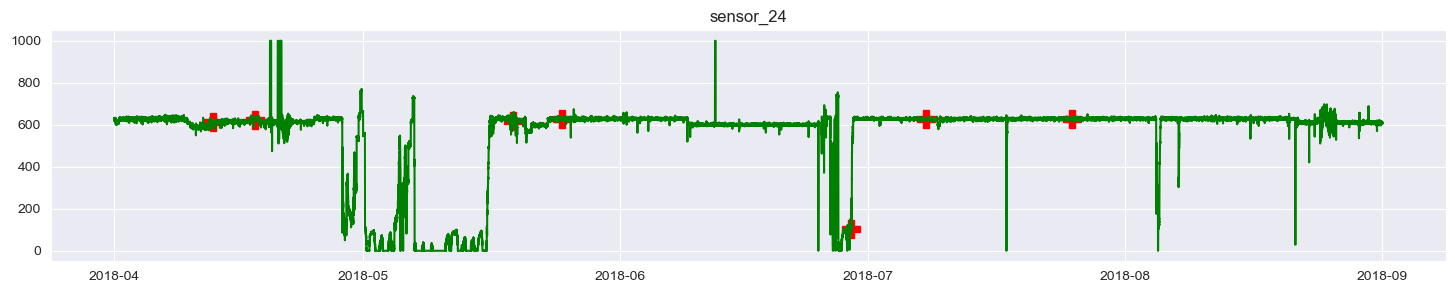

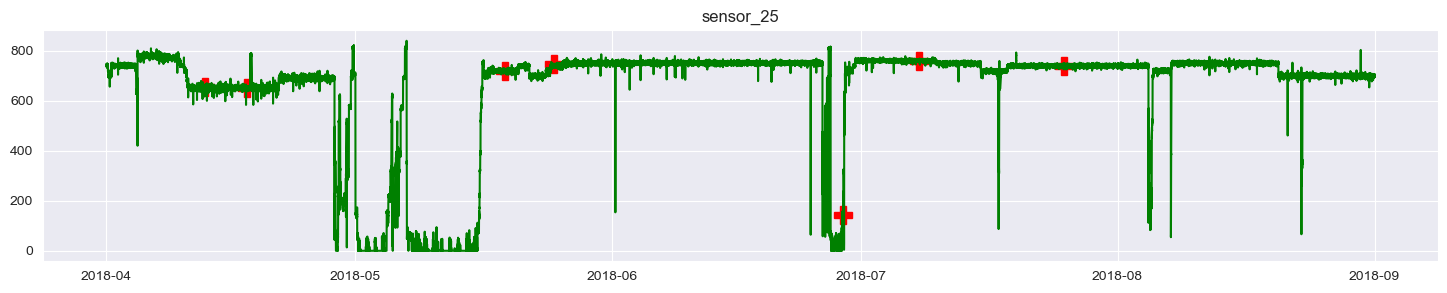

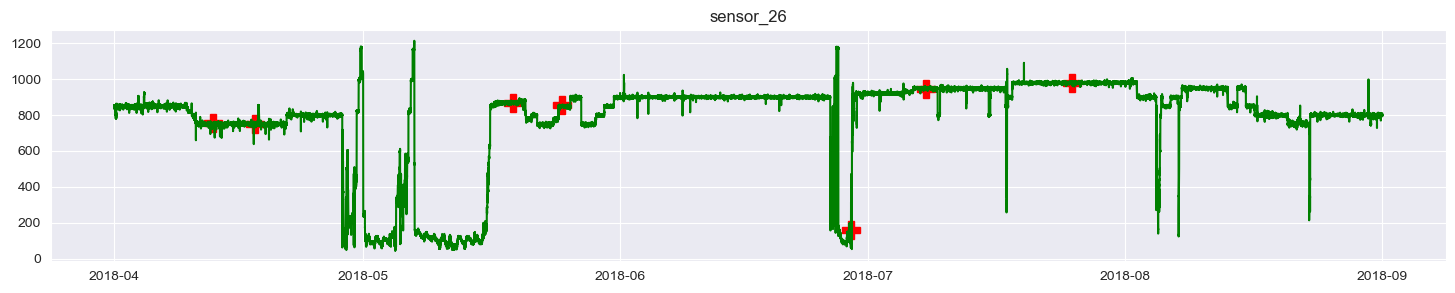

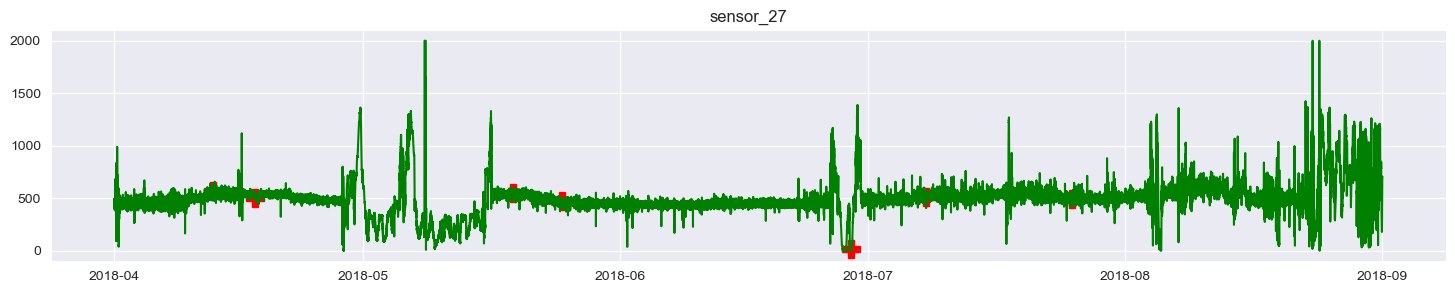

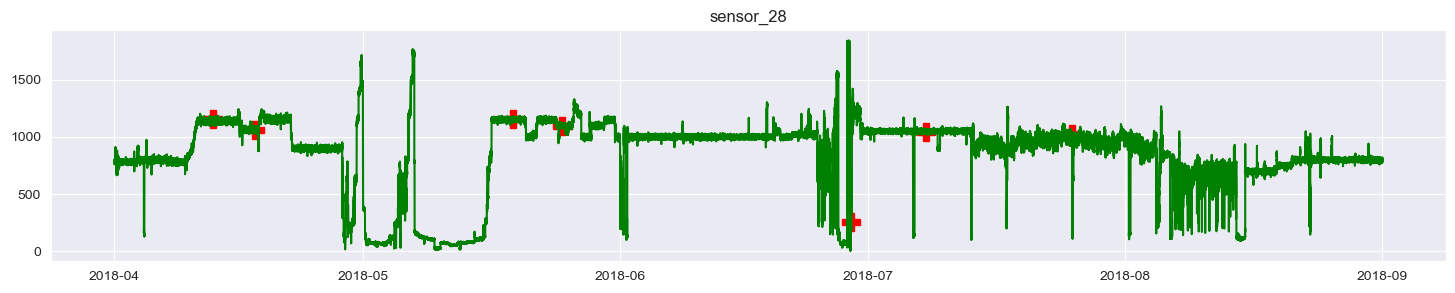

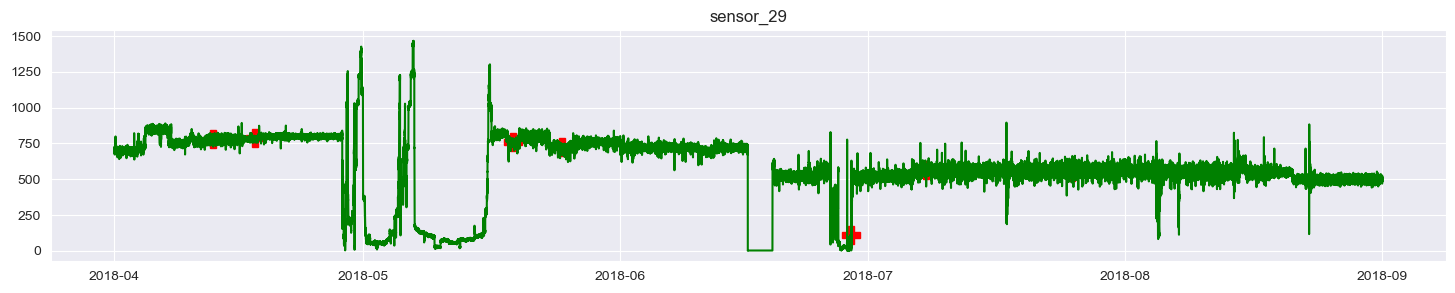

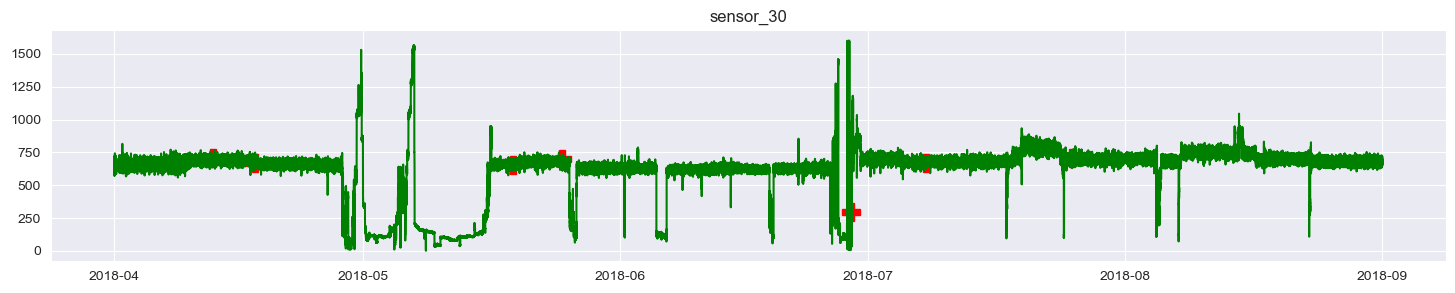

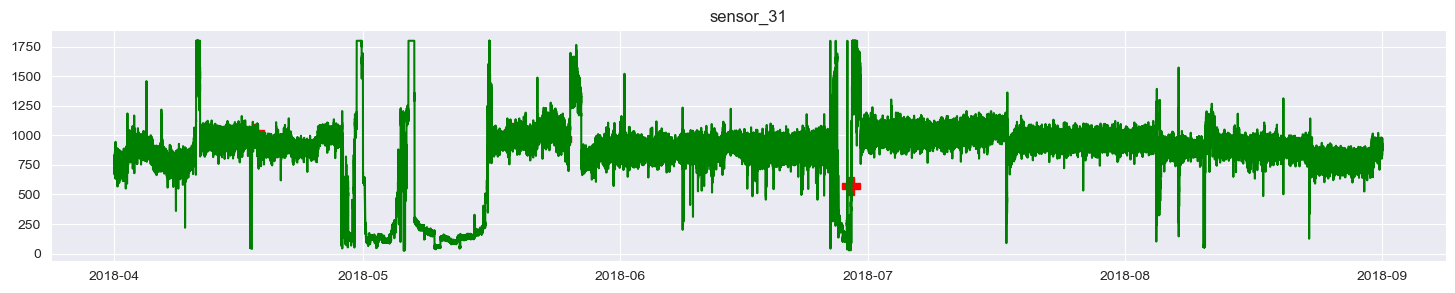

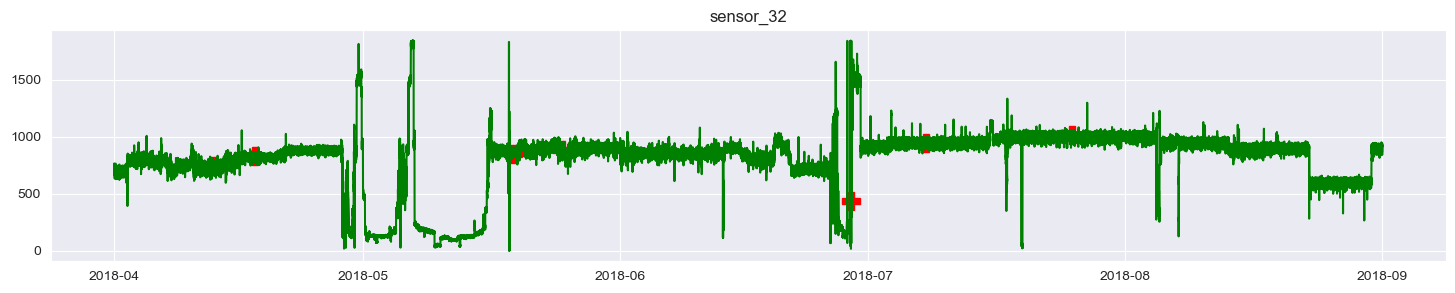

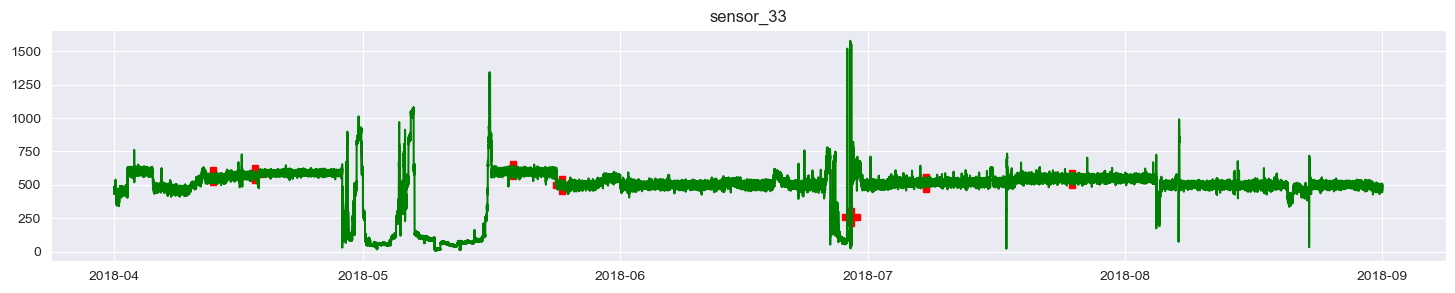

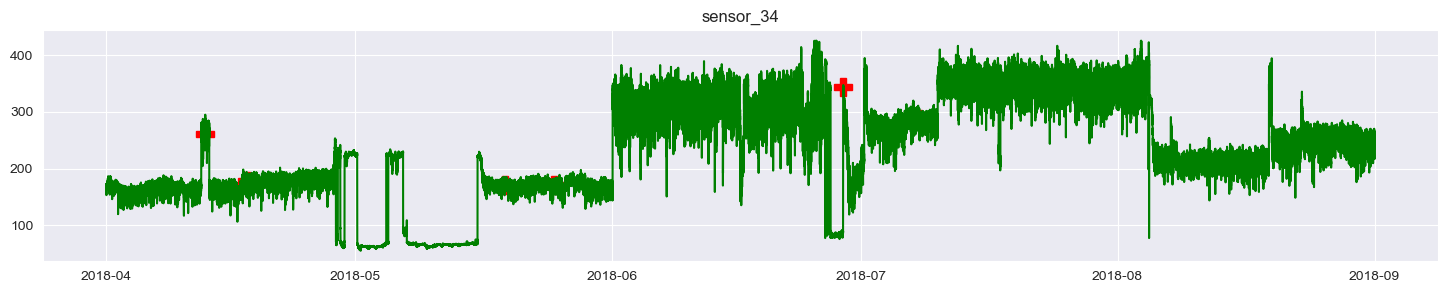

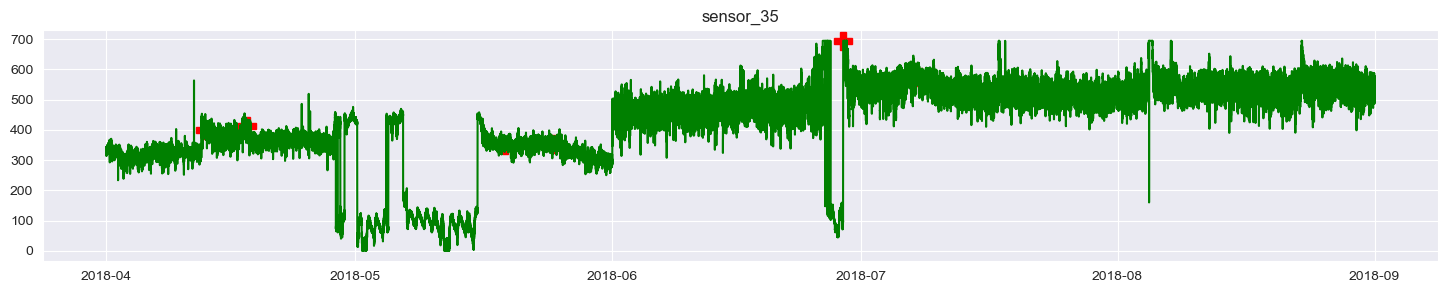

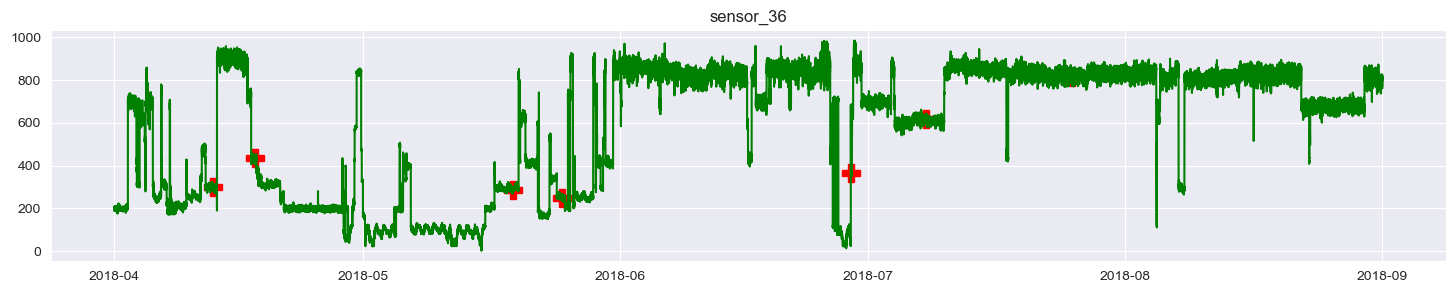

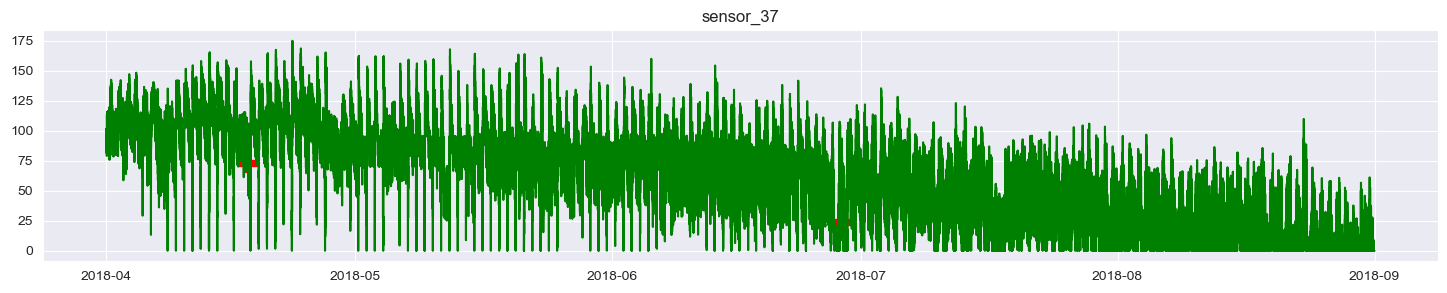

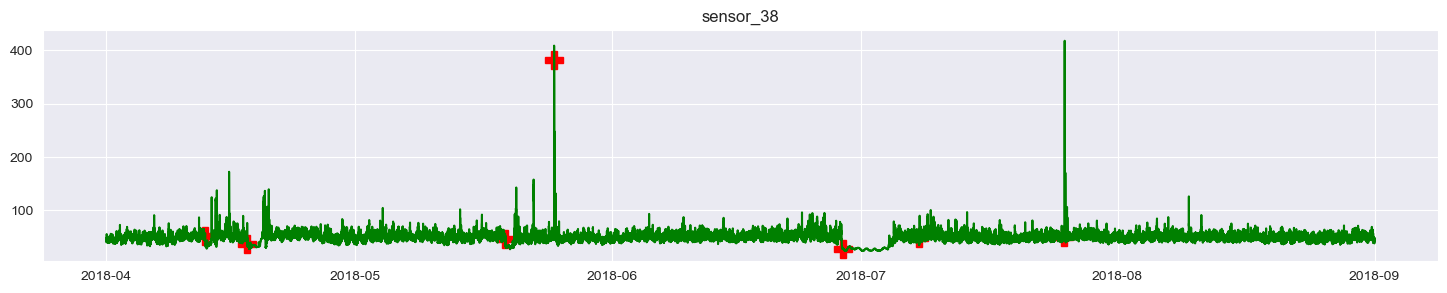

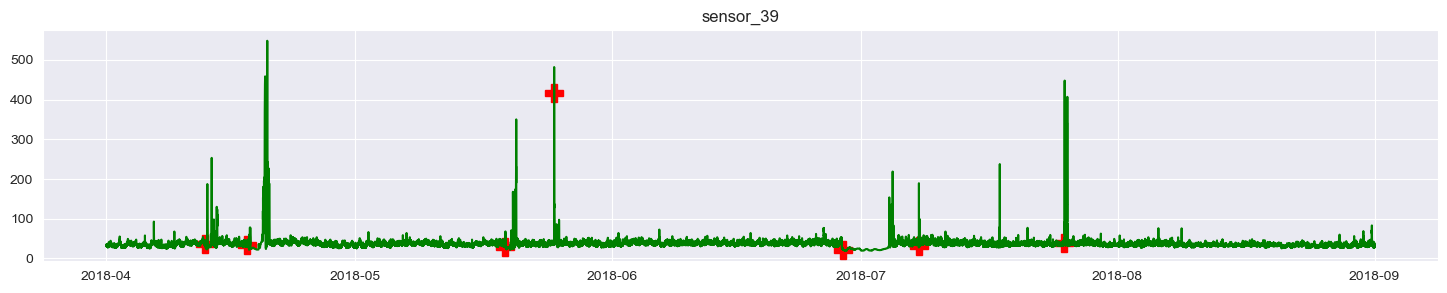

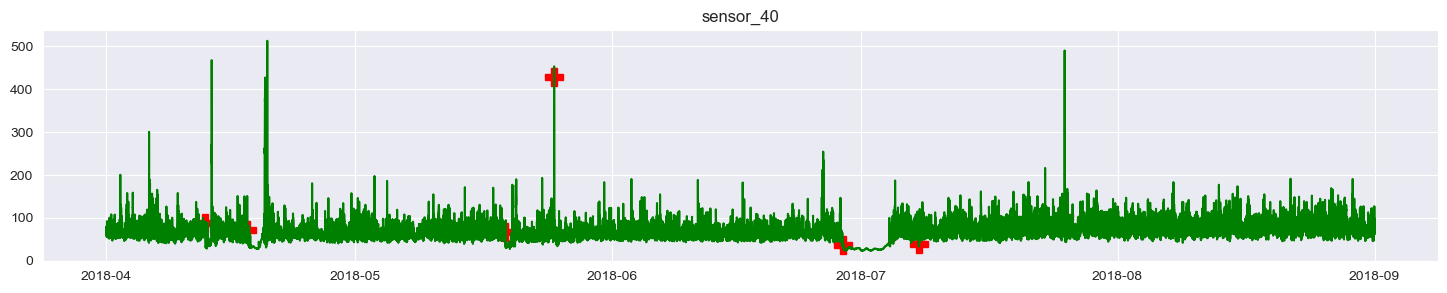

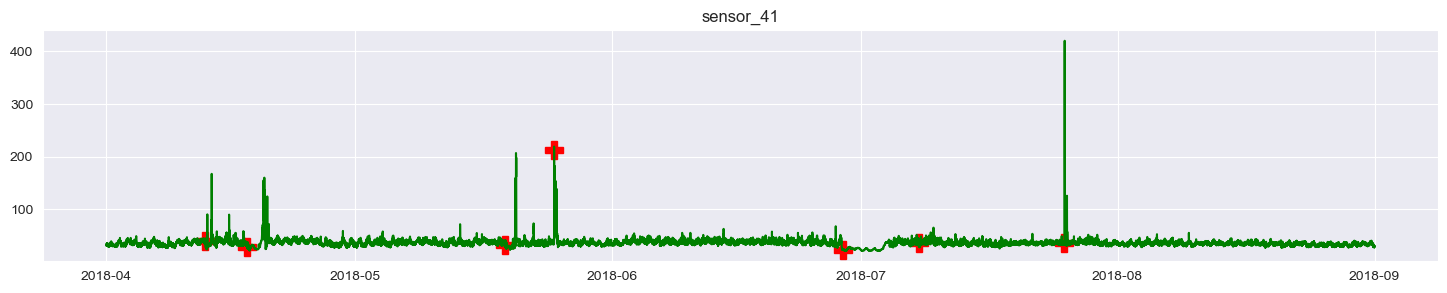

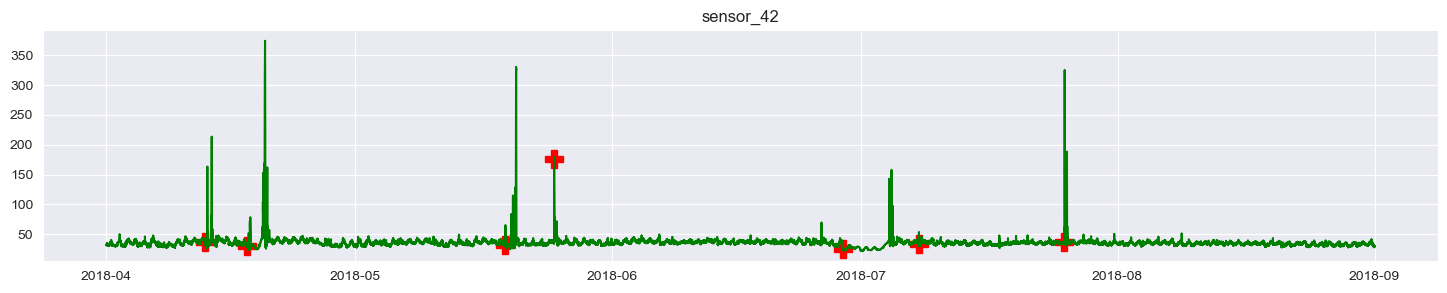

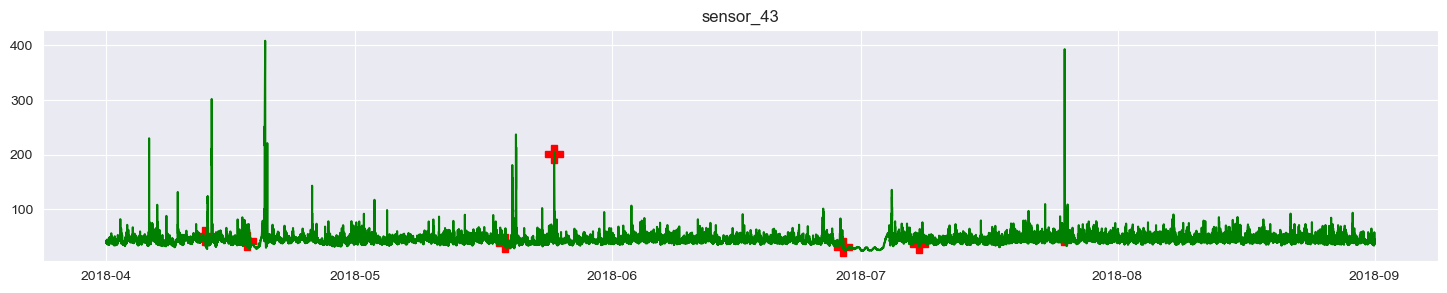

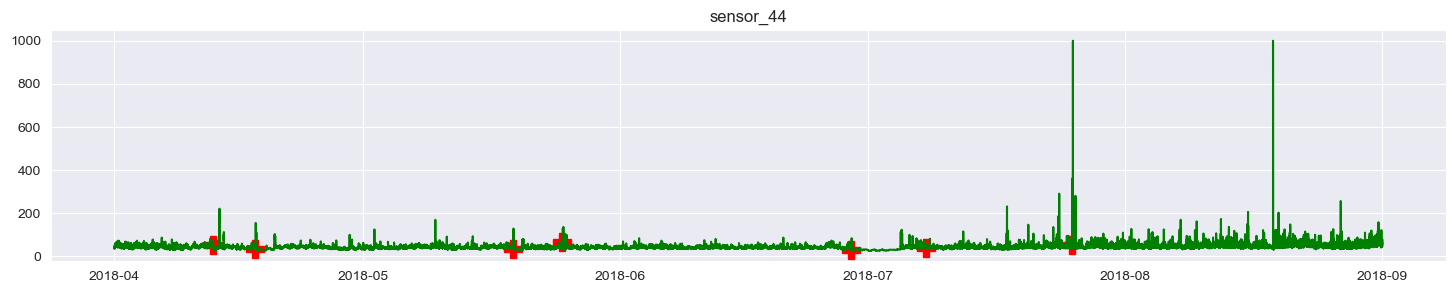

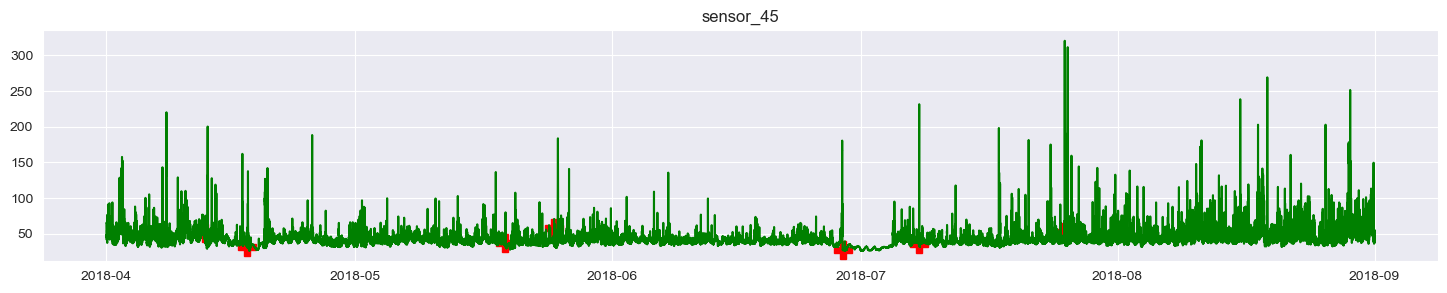

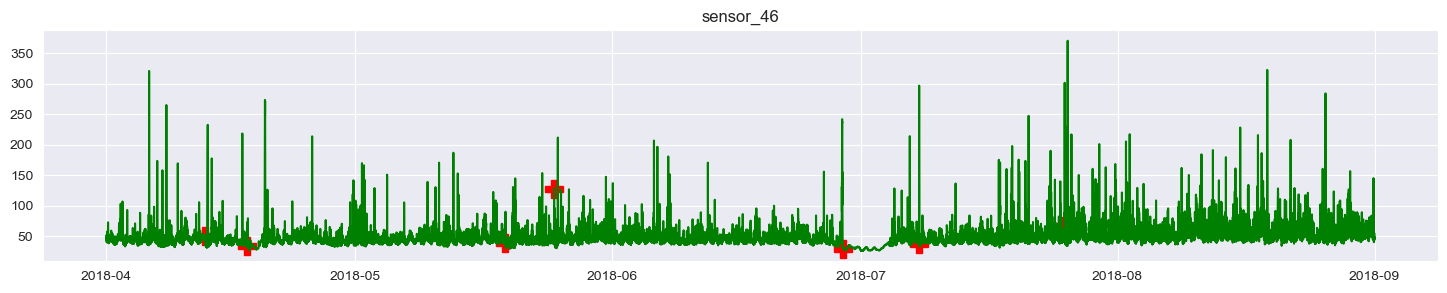

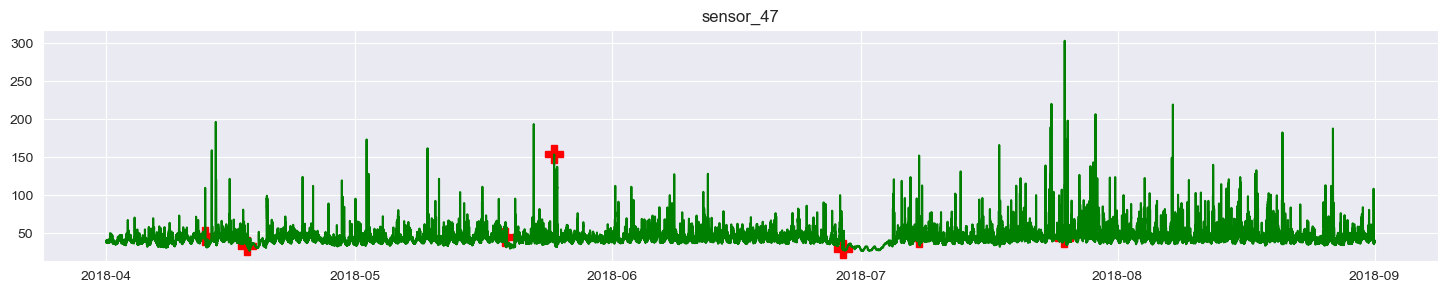

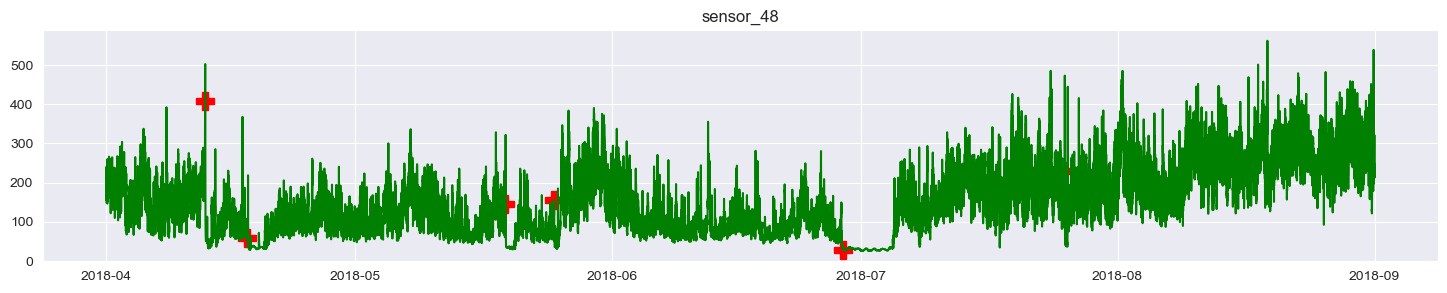

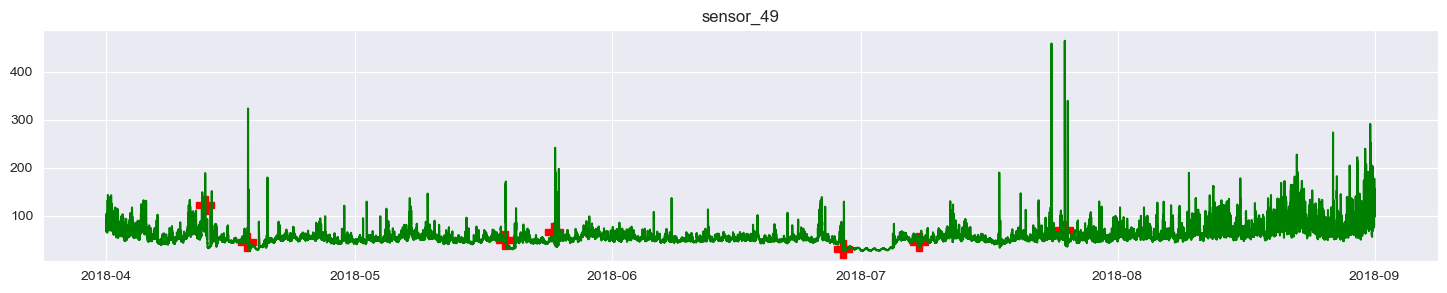

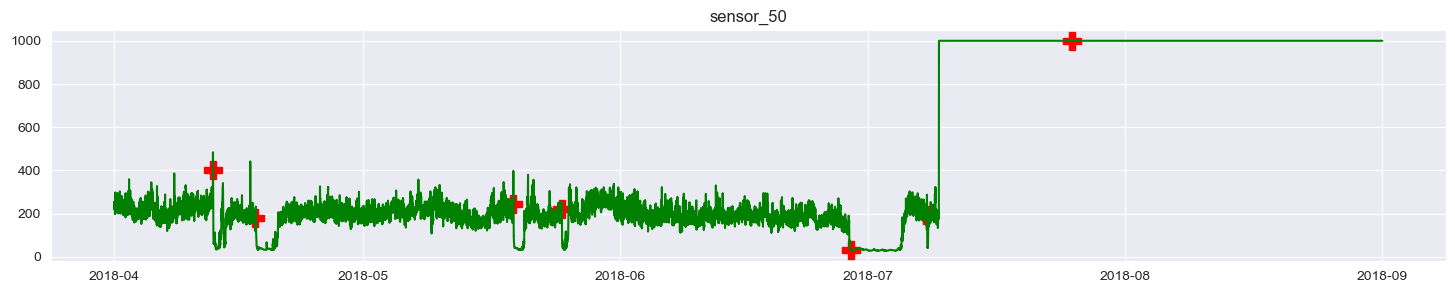

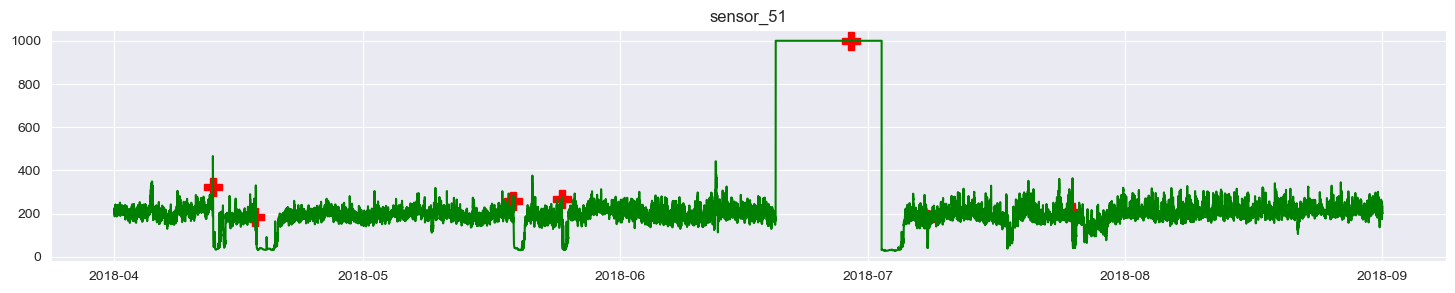

In [20]:
# Plot of each sensor pattern evolving in time. The red markers show the times when the machine is broken

for sensor in sensors:
    _=plt.figure(figsize=(18,3))
    _=plt.plot(broken[sensor], linestyle = 'none', marker='P', color='red', markersize=13)
    _=plt.plot(df_sensors[sensor], color = 'green')
    _=plt.title(sensor)
    

From the above plot one can see that there are sensors that follows a similar pattern: for example sensors 6,7,8,9. 

To eliminate redundant features from our dataset a possible approach (that I am not following now) should be:
choose only one sensor column by pattern behaviour and drop the others belonging to the same category.



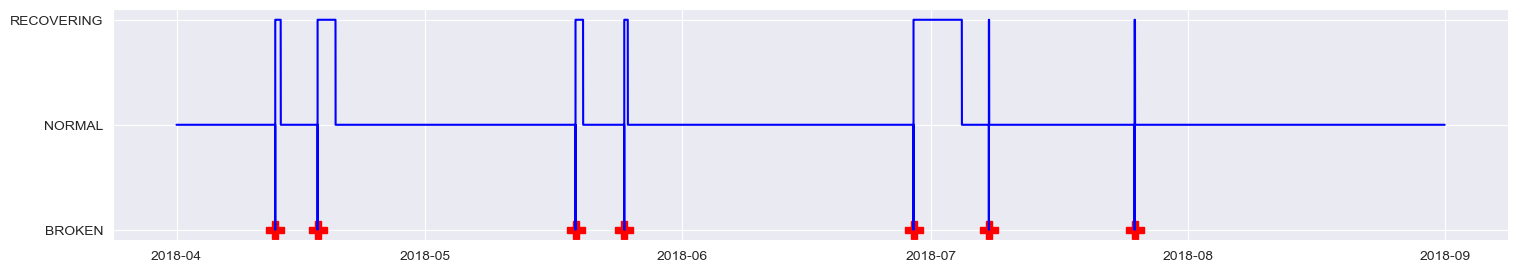

In [21]:
# Plot of the machine_status evolving in time

_=plt.figure(figsize=(18,3))
_=plt.plot(broken['machine_status'], linestyle='none', marker='P', color='red', markersize=13)
_=plt.plot(df_sensors['machine_status'], color='blue')

    

In [22]:
# Calculate the mean time between breakdowns

time_break = df[df['machine_status']== 'BROKEN']['timestamp']
time_break

17155    2018-04-12 21:55:00
24510    2018-04-18 00:30:00
69318    2018-05-19 03:18:00
77790    2018-05-25 00:30:00
128040   2018-06-28 22:00:00
141131   2018-07-08 00:11:00
166440   2018-07-25 14:00:00
Name: timestamp, dtype: datetime64[ns]

In [23]:
l = []

for i in range(len(time_break.values)-1):
    l.append(time_break.values[i+1]-time_break.values[i])

In [24]:
[x.astype('timedelta64[D]')/ np.timedelta64(1, 'D') for x in l]

[5.0, 31.0, 5.0, 34.0, 9.0, 17.0]

In [25]:
import statistics as st

In [26]:
# There is a breakdown every 17 days in average

st.mean([x.astype('timedelta64[D]')/ np.timedelta64(1, 'D') for x in l])

16.833333333333332

## 4. Feature Importance 

In this section I will identify features with an high (Pearson) correlation with the machine_status column.

To calculate the correlation with the label we want to predict, I need to convert it into a numeric column.

In [27]:
# Target variable
y = df['machine_status']


In [28]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'machine_status'. 
df['machine_status'] = label_encoder.fit_transform(df['machine_status']) 

df['machine_status'].unique() 


array([1, 0, 2])

In [29]:
df['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

Hence: 

1 ↔ 'NORMAL'
             
2 ↔ 'RECOVERY'
             
0 ↔ 'BROKEN'

In [30]:
# Correlation of each feature with the label's column

corr1 = df.drop('timestamp', axis = 1).corr()['machine_status']
corr2 = pd.DataFrame(corr1).reset_index().rename(columns={"index": "feature", "machine_status": "corr with label"})
corr3 = corr2[corr2['corr with label'].abs() > 0.5] #.sort_values(by=['corr with label'], ascending = False)
corr3

,feature,corr with label
0,sensor_00,-0.896628
1,sensor_01,-0.672425
2,sensor_02,-0.791284
3,sensor_03,-0.646106
4,sensor_04,-0.915733
6,sensor_06,-0.851092
7,sensor_07,-0.798160
8,sensor_08,-0.771753
9,sensor_09,-0.758372
10,sensor_10,-0.872192


<Axes: >

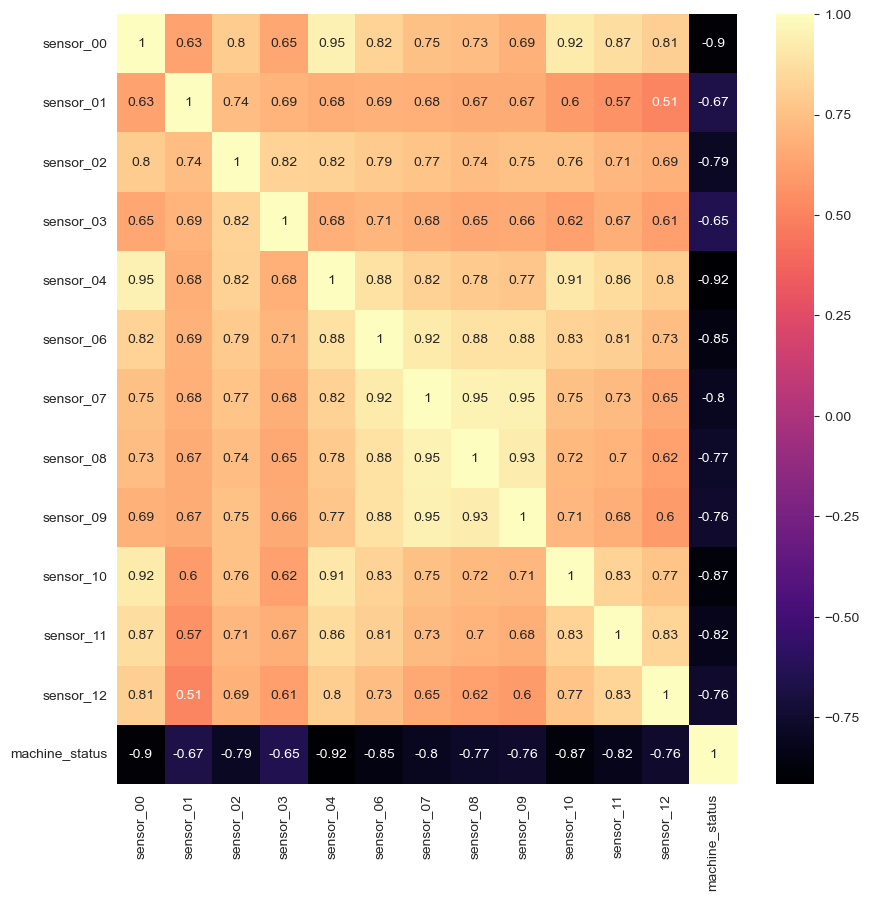

In [31]:
# Heatmap

plt.figure(figsize=(10,10))

sns.heatmap(df[corr3['feature']].corr(),cmap='magma',annot=True)

In [32]:
# Select features with higher correlation with the label

selected_features = corr3['feature']
selected_features = selected_features.values[:-1]
selected_features

array(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12'], dtype=object)

## 6. Feature engineering for time-series data 

Recall our goal: we want to predict in advance a machine breakdown at time t. 

A possible way to achieve our goal is to see what is happening to sensors before the time t. Let's say at time t-&#916;.
By choosing &#916; sufficiently small the values of sensors at time t are greatly affected by the values at time t-&#916;.
The past values are known as lags. 

For this reason we need a function which generates lags features from our dataframe by shifting it backward of &#916;.


In [33]:
# Define the Lag function


def lag(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(),list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names +=[('sensor_%d(t-%d)' %(j+1, i)) for j in range (n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names +=[('sensor_%d(t)' %(j+1)) for j in range (n_vars)]
        else:
            names +=[('sensor_%d(t+%d)' %(j+1, i)) for j in range (n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [34]:
X = df[list(selected_features)+['machine_status']]
X

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,machine_status
0,2.465394,47.09201,53.211800,46.310760,634.375000,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1
1,2.465394,47.09201,53.211800,46.310760,634.375000,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1
2,2.444734,47.35243,53.211800,46.397570,638.888900,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1
3,2.460474,47.09201,53.168400,46.397568,628.125000,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1
4,2.445718,47.13541,53.211800,46.397568,636.458300,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,15.11863,16.65220,15.65393,15.16204,43.17085,54.16052,38.05424,1
220316,2.400463,47.69965,50.564240,43.142361,630.902771,15.15480,16.70284,15.65393,15.11863,43.21038,54.52602,38.53485,1
220317,2.396528,47.69965,50.520830,43.142361,625.925903,15.08970,16.70284,15.69734,15.11863,43.12836,55.11779,38.52678,1
220318,2.406366,47.69965,50.520832,43.142361,635.648100,15.11863,16.56539,15.74074,15.11863,42.35746,55.99321,38.89159,1


In [35]:
# Label

y = df['machine_status']
y.unique()

array([1, 0, 2])

In [36]:
# Choose a time value which represent how much in advance we want to predict the machine breakdown
delta = 10 

**Remark**:  I have taken delta arbitrarily. However one should choose it carefully because the lag value will depend on the correlation of individual values with its past values. Possible methods to do it are: **ACF**, **PACF** plots.

In [37]:
# Apply the lag function to X
data_shift = lag(X, n_in = delta, n_out = 1)


# Remove all non shifted elements. 
remove_list_1 =['sensor_'+str(n)+'(t)' for n in range(1,len(X.columns)+1)] 
remove_list_2 =['sensor_'+str(n)+'(t-'+ str(i)+')' for n in range(1,len(X.columns)+1) for i in range(1,delta)]


In [38]:
data_shift.head()

,sensor_1(t-10),sensor_2(t-10),sensor_3(t-10),sensor_4(t-10),sensor_5(t-10),sensor_6(t-10),sensor_7(t-10),sensor_8(t-10),sensor_9(t-10),sensor_10(t-10),...,sensor_4(t),sensor_5(t),sensor_6(t),sensor_7(t),sensor_8(t),sensor_9(t),sensor_10(t),sensor_11(t),sensor_12(t),sensor_13(t)
10,2.465394,47.09201,53.2118,46.310760,634.3750,13.41146,16.13136,15.56713,15.05353,37.22740,...,46.397568,637.7314,13.41146,16.16753,15.65393,15.11863,39.90199,50.48941,32.80076,1
11,2.465394,47.09201,53.2118,46.310760,634.3750,13.41146,16.13136,15.56713,15.05353,37.22740,...,46.397568,635.6482,13.41146,16.16753,15.84925,15.11863,39.78521,50.78820,33.14559,1
12,2.444734,47.35243,53.2118,46.397570,638.8889,13.32465,16.03733,15.61777,15.01013,37.86777,...,46.397568,630.0926,13.34635,16.16753,15.73351,15.01013,40.04284,50.50479,33.46326,1
13,2.460474,47.09201,53.1684,46.397568,628.1250,13.31742,16.24711,15.69734,15.08247,38.57977,...,46.397568,638.6574,13.31742,16.16753,15.84925,15.16927,40.90296,50.96519,33.63691,1
14,2.445718,47.13541,53.2118,46.397568,636.4583,13.35359,16.21094,15.69734,15.08247,39.48939,...,46.397568,632.4074,13.38976,16.13136,15.53096,15.08970,41.82584,51.72565,34.46501,1


In [39]:
data_y = data_shift.iloc[:,-1] 
data_y.unique()

array([1, 0, 2])

In [40]:
# Transform into a binary classification problem

data_y = data_y.replace([1, 0, 2],[1, 0, 0]) 
data_y.unique()

array([1, 0])

Hence now:

1 ↔ 'NORMAL'

0 ↔ 'BROKEN' + 'RECOVERY'


In [41]:
# Print the columns of data_shift

data_shift.columns

Index(['sensor_1(t-10)', 'sensor_2(t-10)', 'sensor_3(t-10)', 'sensor_4(t-10)',
       'sensor_5(t-10)', 'sensor_6(t-10)', 'sensor_7(t-10)', 'sensor_8(t-10)',
       'sensor_9(t-10)', 'sensor_10(t-10)',
       ...
       'sensor_4(t)', 'sensor_5(t)', 'sensor_6(t)', 'sensor_7(t)',
       'sensor_8(t)', 'sensor_9(t)', 'sensor_10(t)', 'sensor_11(t)',
       'sensor_12(t)', 'sensor_13(t)'],
      dtype='object', length=143)

In [42]:
#Remove sensor(t)-type columns

data_x = data_shift.drop(remove_list_1+remove_list_2, axis=1) 

data_x.drop(data_x.columns[len(data_x.columns)-1], axis=1, inplace=True)

data_x.columns

Index(['sensor_1(t-10)', 'sensor_2(t-10)', 'sensor_3(t-10)', 'sensor_4(t-10)',
       'sensor_5(t-10)', 'sensor_6(t-10)', 'sensor_7(t-10)', 'sensor_8(t-10)',
       'sensor_9(t-10)', 'sensor_10(t-10)', 'sensor_11(t-10)',
       'sensor_12(t-10)'],
      dtype='object')

Hence:

data_x ↔ features

data_y ↔ label

In [43]:
# Features

data_x.head(3)

,sensor_1(t-10),sensor_2(t-10),sensor_3(t-10),sensor_4(t-10),sensor_5(t-10),sensor_6(t-10),sensor_7(t-10),sensor_8(t-10),sensor_9(t-10),sensor_10(t-10),sensor_11(t-10),sensor_12(t-10)
10,2.465394,47.09201,53.2118,46.31076,634.3750,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716
11,2.465394,47.09201,53.2118,46.31076,634.3750,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716
12,2.444734,47.35243,53.2118,46.39757,638.8889,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894


In [44]:
# Label

data_y.unique()

array([1, 0])

## 7. ML - Model

In [45]:
# Import machine learning libraries

import tensorflow as tf

In [46]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

In [123]:
#!pip install --upgrade keras-preprocessing

Long Short-Term Memory model (LSTM model) is a subtype of Recurrent Neural Networks (RNN). It is used to recognize patterns in data sequences, such as those that appear in sensor data. Thus it should be a good choice in our case.

In [47]:
# Define the model

def model_(in_shape):
    
    inputs= tf.keras.Input(shape=(in_shape[1],in_shape[2]))
    
    x=LSTM(8, input_shape=(in_shape[1],in_shape[2]),return_sequences=True)(inputs)
    x=LSTM(8)(x)
    
    out_class=Dense(1,activation='sigmoid', name='out')(x)
    
    model=tf.keras.Model(inputs=inputs, outputs=out_class)
    
    model.compile(loss={'out' :'binary_crossentropy'},
                         optimizer='adam',
                         metrics={'out':'acc'})
    #summary
    print(model.summary())
    return model  

In [48]:
# Split the data

X_train = data_x.iloc[0:110000, :]
X_test = data_x.iloc[110000:140000 ,:]
X_val= data_x.iloc[140000:: ,:]

y_train = data_y.iloc[0:110000]
y_test= data_y.iloc[110000:140000]
y_val = data_y.iloc[140000::]

**Remark:** I didn't use train_test_split() function to split the data to don't destroy the time-series sequentiality.

In [49]:
# Normalize the data with MinMax method

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = data_x.columns

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = data_x.columns

X_val = scaler.transform(X_val)
X_val = pd.DataFrame(X_val)
X_val.columns = data_x.columns



In [50]:
# Set the index

train_df = X_train.set_index(data_x.iloc[0:110000, :].index)
test_df = X_test.set_index(data_x.iloc[110000:140000 ,:].index)
val_df = X_val.set_index(data_x.iloc[140000:: ,:].index)

In [51]:
# Type for input

train_X = np.asarray(train_df).astype('float32')
train_Y = y_train.astype('float32')
    
val_X = np.asarray(val_df).astype('float32')
val_Y = y_val.astype('float32')
    
test_X = np.asarray(test_df).astype('float32')
test_Y = y_test.astype('float32')

In [52]:
# Reshape for input 

timesteps=1

samples_T=int(np.floor(train_X.shape[0]/timesteps))
samples_V=int(np.floor(val_X.shape[0]/timesteps))
samples_Te=int(np.floor(test_X.shape[0]/timesteps))

train_X=train_X.reshape((samples_T,timesteps,train_X.shape[1]))   #samples, timesteps, sensors   
val_X=val_X.reshape((samples_V,timesteps,val_X.shape[1]))       
test_X=test_X.reshape((samples_Te,timesteps,test_X.shape[1]))  

In [53]:
# Callback method to prevent overfitting

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [54]:
# Fit the model

model = model_(train_X.shape)

history = model.fit(train_X, train_Y, epochs=11, batch_size=128, validation_data=(val_X, val_Y), shuffle=False, callbacks=[callback])



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 12)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 8)              672       
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 out (Dense)                 (None, 1)                 9         
                                                                 
Total params: 1225 (4.79 KB)
Trainable params: 1225 (4.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/11


860/860 [==============================] - 23s 14ms/step - loss: 0.2105 - acc: 0.9457 - val_loss: 0.0247 - val_acc: 0.9985
Epoch 2/11
860/860

In [55]:
# Predictions
yclass_ = model.predict(test_X)    

# Transformation to get (n,)
yclass = np.transpose(yclass_)[0] 

# Applying transformation to get binary values predictions with 0.5 as thresold
yclass = list(map(lambda x: 0 if x < 0.5 else 1, yclass))

938/938 [==============================] - 6s 4ms/step


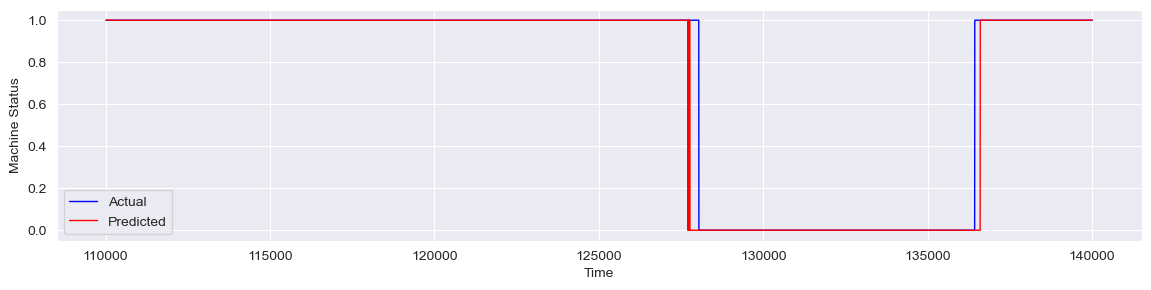

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(14, 3))
plt.plot(test_Y, color='blue', label='Actual', linestyle='solid', linewidth=1)
plt.plot(data_y.index[110000:140000], yclass, color='red', label='Prediction', linestyle='solid', linewidth=1 )
plt.ylabel('Machine Status')
plt.xlabel('Time')
plt.legend(['Actual', 'Predicted']) 

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_Y,yclass))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      8391
         1.0       1.00      0.98      0.99     21609

    accuracy                           0.98     30000
   macro avg       0.97      0.99      0.98     30000
weighted avg       0.99      0.98      0.98     30000



**Conclusion**: We are able to predict the breakdown in advance.

Possible ways to optimize the solution:

1. Deal with Outliers.
2. Balance the data.
3. Try different feature engineering and feature selection.
4. By analyzing the model performance, discover the best model parameters combination.